In [1]:
import pandas as pd
import pgeocode

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Import student data
df17 = pd.read_csv('XXFRO Freshman Orientation Advising 17F.csv')
df18 = pd.read_csv('XXFRO Freshman Orientation Advising 18F.csv')
df19 = pd.read_csv('XXFRO Freshman Orientation Advising 19F.csv')
df20 = pd.read_csv('XXFRO Freshman Orientation Advising 20F.csv')
              

In [3]:
df_all = pd.concat([df17,df18,df19,df20]).drop_duplicates().reset_index(drop=True)

In [4]:
# df_all.info()

In [5]:
# df_all.head()

## General Cleaning

In [6]:
# remove white space in column names 
df_all.columns = df_all.columns.str.replace(' ', '') 

In [7]:
# df_all.columns

We will build a student profile based on cerain aspects like Standardized score(SAT), HS GPA, zipcode, gender, sports

In [8]:
#Remove columns that are not required for our analysis 
final_table_columns = ['Applicant','Gender','MajorDesc.','XNnResFlagDesc','XApplTotSat','ACTCSCORE',
                       'HS}GPA','AddrLine1','City','State','Zip']
df_all = df_all.drop(columns=[col for col in df_all if col not in final_table_columns])


In [9]:
#rename columns
df_all = df_all.rename(columns={'MajorDesc.':'Major',
                                'XNnResFlagDesc':'Housing',
                                'XApplTotSat':'SAT',
                                'ACTCSCORE':'ACT',
                                'HS}GPA':'HSGPA'})

In [10]:
# df_all.head()

In [11]:
df_all.isna().sum()

Applicant       0
Gender          0
Major           0
Housing         0
SAT             0
ACT          2299
HSGPA           1
AddrLine1       0
City            0
State           2
Zip             1
dtype: int64

## Academic Program / Major

In the Academic program ,The first 4 letters represents the Major , the next set of 4 letters either represents a specialization or a particular program . Most students start out with a general major and select a specialization after the freshmen year. So we will use general major for our anaysys .

In [12]:
# Force string data type for Academic PRogram
# df1['AcademicProgram'] = df1['AcademicProgram'].astype(str)

In [13]:
# # USe only the first 4 letters of Academic Program
# for i in range(0,len(df1['AcademicProgram'])):
# #     df1['AcademicProgram'][i] = df1['AcademicProgram'][i][0:4]

In [14]:
df_all['Major'].unique()

array(['Business Administration', 'Biochemistry',
       'Undeclared Liberal Arts', 'Political Science',
       'Nursing (Reg Nurse)', 'Computer Science', 'Accounting',
       'Psychology', 'Creative Writing', 'Criminology', 'Chemistry',
       'Entrepreneurship', 'Undeclared Business', 'History',
       'Health Studies', 'Biology', 'Mathematics', 'Marketing',
       'Graphic Design', 'Literature', 'Hotel Restaurant & Tourism Mgt',
       'Film and Animation, Film and Animation', 'Sport Management',
       'Psychology, Criminology', 'Theater Arts', 'Finance', 'Humanities',
       'Film and Animation', 'Communication Studies, Graphic Design',
       'Communication Studies', 'Sociology',
       'Clinical Laboratory Sciences', 'Fine Arts, Graphic Design',
       'Medical Imaging Sciences', 'Graphic Design, Graphic Design',
       'Political Science, Communication Studies', 'Allied Health Tech',
       'Theater Arts, Film and Animation', 'Creative Writing, History',
       'Political Scien

In [15]:
# df_all.loc[df_all['Major']=='Fine Arts, Graphic Design']

Seems some majors also have minors ,For our analysis we will focus on extracting only the info about majors

In [16]:
#Split major description into major,minor and keep only major
df_all['Major'] = df_all['Major'].map(lambda x : x.split(',')[0])

In [17]:
df_all['Major'].unique()

array(['Business Administration', 'Biochemistry',
       'Undeclared Liberal Arts', 'Political Science',
       'Nursing (Reg Nurse)', 'Computer Science', 'Accounting',
       'Psychology', 'Creative Writing', 'Criminology', 'Chemistry',
       'Entrepreneurship', 'Undeclared Business', 'History',
       'Health Studies', 'Biology', 'Mathematics', 'Marketing',
       'Graphic Design', 'Literature', 'Hotel Restaurant & Tourism Mgt',
       'Film and Animation', 'Sport Management', 'Theater Arts',
       'Finance', 'Humanities', 'Communication Studies', 'Sociology',
       'Clinical Laboratory Sciences', 'Fine Arts',
       'Medical Imaging Sciences', 'Allied Health Tech',
       'Business Management', 'Government and Law',
       'Interdisciplinary Studies', 'Liberal Arts',
       'Exploring Soc & Behavioral Sci', 'Exploring Arts',
       'Exploring Education', 'Exploring STEM', 'Exploring Humanities',
       'Communication', 'Government and Politics',
       'Exploring Communication', 

In [18]:
df_all['Major'].value_counts()

Undeclared Liberal Arts           289
Biology                           240
Business Administration           179
Nursing (Reg Nurse)               177
Film and Animation                168
Psychology                        157
Computer Science                  141
Criminology                       129
Health Studies                    110
Sport Management                  101
Theater Arts                       96
Accounting                         96
Undeclared Business                63
Marketing                          62
Biochemistry                       59
Finance                            56
Creative Writing                   55
Liberal Arts                       51
Mathematics                        51
Hotel Restaurant & Tourism Mgt     48
History                            44
Chemistry                          42
Graphic Design                     39
Communication Studies              37
Literature                         29
Exploring Education                17
Government a

We will further group the majors into 3 categories as follows : STEM, Commmerce and Humanites/arts

In [19]:
#Convert majors into groups 
major_category = dict.fromkeys(df_all['Major'].unique(), "")

In [20]:
# major_category

In [21]:
major_category = {   'Business Administration': 'COMMERCE',
                     'Biochemistry': 'STEM',
                     'Undeclared Liberal Arts': 'HUMANITIES/ARTS',
                     'Political Science': 'STEM',
                     'Nursing (Reg Nurse)': 'STEM',
                     'Computer Science': 'STEM',
                     'Accounting': 'COMMERCE',
                     'Psychology': 'STEM',
                     'Creative Writing': 'HUMANITIES/ARTS',
                     'Criminology': 'STEM',
                     'Chemistry': 'STEM',
                     'Entrepreneurship': 'COMMERCE',
                     'Undeclared Business': 'COMMERCE',
                     'History': 'HUMANITIES/ARTS',
                     'Health Studies': 'STEM',
                     'Biology': 'STEM',
                     'Mathematics': 'STEM',
                     'Marketing': 'COMMERCE',
                     'Graphic Design': 'STEM',
                     'Literature': 'HUMANITIES/ARTS',
                     'Hotel Restaurant & Tourism Mgt': 'COMMERCE',
                     'Film and Animation': 'STEM',
                     'Sport Management': 'COMMERCE',
                     'Theater Arts': 'HUMANITIES/ARTS',
                     'Finance': 'COMMERCE',
                     'Humanities': 'HUMANITIES/ARTS',
                     'Communication Studies': 'HUMANITIES/ARTS',
                     'Sociology': 'STEM',
                     'Clinical Laboratory Sciences': 'STEM',
                     'Fine Arts': 'HUMANITIES/ARTS',
                     'Medical Imaging Sciences': 'STEM',
                     'Allied Health Tech': 'STEM',
                     'Business Management': 'COMMERCE',
                     'Government and Law': 'HUMANITIES/ARTS',
                     'Interdisciplinary Studies': 'HUMANITIES/ARTS',
                     'Liberal Arts': 'HUMANITIES/ARTS',
                     'Exploring Soc & Behavioral Sci': 'STEM',
                     'Exploring Arts': 'HUMANITIES/ARTS',
                     'Exploring Education': 'HUMANITIES/ARTS',
                     'Exploring STEM': 'STEM',
                     'Exploring Humanities': 'HUMANITIES/ARTS',
                     'Communication': 'HUMANITIES/ARTS',
                     'Government and Politics': 'HUMANITIES/ARTS',
                     'Exploring Communication': 'HUMANITIES/ARTS',
                     'Luxury Hospitality Management': 'COMMERCE'}

In [22]:
df_all['Major'] = df_all['Major'].map(major_category)

In [23]:
df_all['Major'].value_counts()

STEM               1377
HUMANITIES/ARTS     685
COMMERCE            634
Name: Major, dtype: int64

<AxesSubplot:ylabel='Major'>

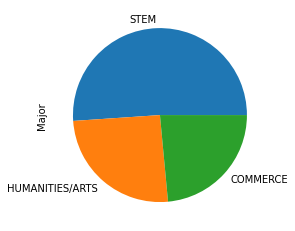

In [24]:
pd.value_counts(df_all['Major']).plot(kind="pie")

In [25]:
df_all['Housing'].value_counts()

Resident    2051
Commuter     645
Name: Housing, dtype: int64

## SAT score

In [26]:
# Check how many students dont have SAT scores  but have ACT scores

df_all[(df_all['SAT']==0)&(df_all['ACT']>0)].count()

Applicant    328
Gender       328
Major        328
Housing      328
SAT          328
ACT          328
HSGPA        328
AddrLine1    328
City         328
State        328
Zip          328
dtype: int64

Seems there are a about 300 students with no SAT scores but have ACT scores. Since bulk of our students have SAT we will use concordance tables to convert ACT scores into equivalent SAT scores.

In [27]:
df_concordance = pd.read_csv('Concordance_table.csv')

In [28]:
df_concordance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ACT     28 non-null     int64
 1   SAT     28 non-null     int64
dtypes: int64(2)
memory usage: 576.0 bytes


In [29]:
# Remove whitespace from column names 
df_concordance.columns = df_concordance.columns.str.replace(' ', '') 

In [30]:
# Convert the Concordance table into dictionary  
Concordance_table=dict(zip(df_concordance.ACT, df_concordance.SAT))

In [31]:
Concordance_table.values()

dict_values([1590, 1540, 1500, 1460, 1430, 1400, 1370, 1340, 1310, 1280, 1240, 1210, 1180, 1140, 1110, 1080, 1040, 1010, 970, 930, 890, 850, 800, 760, 710, 670, 630, 590])

In [32]:
# Find equivalent SAT score based on Reported ACt score 
df_all['SAT_concordance'] = df_all['ACT']
df_all['SAT_concordance']=df_all['SAT_concordance'].map(Concordance_table)

In [33]:
# Concordance_table

In [34]:
df_all['SAT_concordance'].value_counts().sum()

397

In [35]:
#Find max score between ACtual SAT and Concordance SAT
df_all["SAT"] = df_all[["SAT_concordance", "SAT"]].max(axis=1)

In [36]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2696 entries, 0 to 2695
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Applicant        2696 non-null   int64  
 1   Gender           2696 non-null   object 
 2   Major            2696 non-null   object 
 3   Housing          2696 non-null   object 
 4   SAT              2696 non-null   float64
 5   ACT              397 non-null    float64
 6   HSGPA            2695 non-null   object 
 7   AddrLine1        2696 non-null   object 
 8   City             2696 non-null   object 
 9   State            2694 non-null   object 
 10  Zip              2695 non-null   object 
 11  SAT_concordance  397 non-null    float64
dtypes: float64(3), int64(1), object(8)
memory usage: 252.9+ KB


In [37]:
# Check to see if SAT scores were updated 
df_all[(df_all['SAT']==0)&(df_all['ACT']>0)]['SAT'].count()

0

In [38]:
# Check how many students with no SAT scores.
df_all[df_all['SAT']==0].count()

Applicant          191
Gender             191
Major              191
Housing            191
SAT                191
ACT                  0
HSGPA              190
AddrLine1          191
City               191
State              191
Zip                191
SAT_concordance      0
dtype: int64

There are about 200 students with no scores . Although these students are admitted, their course placement is individualized based on Hs courses, placement tests etc . For our analysis we cant included these students as we dont have any relevant data .

In [39]:
#Drop any students with no scores
df_all = df_all[df_all['SAT']>0]
# keep only the updated SAT column
df_all.drop(columns=['ACT','SAT_concordance'],inplace=True)

In [40]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2505 entries, 0 to 2695
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Applicant  2505 non-null   int64  
 1   Gender     2505 non-null   object 
 2   Major      2505 non-null   object 
 3   Housing    2505 non-null   object 
 4   SAT        2505 non-null   float64
 5   HSGPA      2505 non-null   object 
 6   AddrLine1  2505 non-null   object 
 7   City       2505 non-null   object 
 8   State      2503 non-null   object 
 9   Zip        2504 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 215.3+ KB


Seems a couple students are msising any info and some have no reported scores , we will drop these data points as they wont help us in any way. 

In [41]:
#drop records with null values 
df_all = df_all.dropna(how='any',axis=0) 

In [42]:
# df1['SAT'] = df1['SAT'].dropna()

In [43]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2503 entries, 0 to 2695
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Applicant  2503 non-null   int64  
 1   Gender     2503 non-null   object 
 2   Major      2503 non-null   object 
 3   Housing    2503 non-null   object 
 4   SAT        2503 non-null   float64
 5   HSGPA      2503 non-null   object 
 6   AddrLine1  2503 non-null   object 
 7   City       2503 non-null   object 
 8   State      2503 non-null   object 
 9   Zip        2503 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 215.1+ KB


In [44]:
df_all['SAT'] = df_all['SAT'].astype(int)
df_all['Applicant'] = df_all['Applicant'].astype(int)


## Address, Distance 

In [45]:
df_all['Zip'] = df_all['Zip'].map(lambda x : x.split('-')[0])

In [46]:
df_all['Zip'] = df_all['Zip'].astype(int)

In [47]:
#add leading zeroes to convert zip in 5 numbers
df_all['Zip'] = df_all['Zip'].astype(str).str.zfill(5)

In [48]:
dist = pgeocode.GeoDistance('US')# US zip code library
df_all['Univ_zip']='07940'#University zipcode
df_all['Univ_zip'] = df_all['Univ_zip'].astype(str)
#Distance calculation from Univ zipcode to student zipcode#
df_all['dist'] = dist.query_postal_code(list(df_all['Univ_zip']), list(df_all['Zip']))

In [49]:
df_all["Address"] = df_all['AddrLine1'] + ', ' + df_all['City'] + ', ' + df_all['State'] + ', ' + df_all['Zip']

In [50]:
df_all = df_all.loc[df_all['State']== 'NJ']

In [51]:
df_all.to_csv('nj.csv')

In [52]:
df_all.drop(columns=['AddrLine1','City','State','Univ_zip'],inplace = True)

In [53]:
df_all['Zip'] = df_all['Zip'].astype(str).str.zfill(5)

A lot of students apply because of word of mouth or because their friends are also applying to the same university. To account for this we will inlcude a zipcode count parameter which will tell us how many students from the same area.

In [54]:
# # len(df_all['Zip'].value_counts().map(lambda x:x <20))
# # df_all.groupby(by='Zip').filter(lambda x: len(x) > 1)
# df_all[df_all['Zip'].map(df_all['Zip'].value_counts()) < 5]['Zip'].unique()

In [55]:
df_all['Zip_Count'] = df_all.groupby('Zip')['Zip'].transform('count')

## HSGPA

In [56]:
 df_all['HSGPA'] = df_all['HSGPA'].str.replace(" ",'0')

In [57]:
df_all['HSGPA'] = df_all['HSGPA'].str.rstrip(',')
    

In [58]:
df_all['HSGPA'] = df_all['HSGPA'].str.lstrip(',')

In [59]:
#  df_all['HSGPA'] = df_all['HSGPA'].str.strip()

In [60]:
type( df_all['HSGPA'][0])

str

In [61]:
# convert string to list using comma as seperator
df_all['HSGPA'] = df_all['HSGPA'].str.split(",")

In [62]:
#convert elements of list from string to int
df_all['HSGPA'] = df_all['HSGPA'].map(lambda x: [float(i) for i in x])

In [63]:
#replace list with max in list 
df_all['HSGPA'] = df_all['HSGPA'].map(lambda x: max(x))
#Covert to int data type
df_all['HSGPA'] = df_all['HSGPA'].astype(float)
    

In [64]:
# df_all.head()

In [65]:
# df1.to_csv('preprocessed_data.csv')

## Income

In [66]:
df_income = pd.read_csv('Income_data.csv')

In [67]:
# df_income.head()

In [68]:
new_header = df_income.iloc[0] #Select new column names as the first row
df_income = df_income[1:] #exclude first row
df_income.columns = new_header#Relabel column names 

In [69]:
# df_income.head()

In [70]:
#Select last 5 characters as zip
df_income['Zip'] = df_income['Geographic Area Name'].astype(str).str[-5:]

In [71]:
len(df_income['Zip'].unique())

595

In [72]:
inc = df_income[['Estimate!!Households!!Median income (dollars)']]


In [73]:
inc['Estimate!!Households!!Median income (dollars)'].replace('-','0',inplace=True)

C:\Users\Laurel\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [74]:
inc['Estimate!!Households!!Median income (dollars)'].median()

88892.0

In [75]:
df_all = pd.merge(df_all, df_income[['Zip','Estimate!!Households!!Median income (dollars)']], on='Zip')

In [76]:
# df_all

In [77]:
df_all.rename(columns={'Estimate!!Households!!Median income (dollars)':'Median Income'},inplace=True)

In [78]:
df_all['Median Income'].fillna('0',inplace= True)

In [79]:
df_all['Median Income'] = df_all['Median Income'].astype(int)

In [80]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2048
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Applicant      2049 non-null   int32  
 1   Gender         2049 non-null   object 
 2   Major          2049 non-null   object 
 3   Housing        2049 non-null   object 
 4   SAT            2049 non-null   int32  
 5   HSGPA          2049 non-null   float64
 6   Zip            2049 non-null   object 
 7   dist           2049 non-null   float64
 8   Address        2049 non-null   object 
 9   Zip_Count      2049 non-null   int64  
 10  Median Income  2049 non-null   int32  
dtypes: float64(2), int32(3), int64(1), object(5)
memory usage: 168.1+ KB


In [81]:
# df_all.head()

In [82]:
# df_all['Median Income'].describe()

In [83]:
df_income['Estimate!!Households!!Median income (dollars)'].replace('-','0').fillna('0').astype(float).describe()

count       595.000000
mean      93156.556303
std       42210.276688
min           0.000000
25%       68321.500000
50%       88892.000000
75%      119270.000000
max      300002.000000
Name: Estimate!!Households!!Median income (dollars), dtype: float64

In [84]:
# len(df_all['Zip'].unique())

In [85]:
# len(df_income['Geographic Area Name'].unique())

##  Completion rate Scholarship and SPSERV

In [86]:
df_completion = pd.read_csv("Completion.csv")


In [87]:
df_completion.head()

,Applicant,SPSERV,Scholarship amount,Completed
0,1831212,HON,9986,Yes
1,1614000,ATH,0,Yes
2,1672949,ATH,0,Yes
3,1959689,ATH,0,Yes
4,1691624,ATH,0,Yes


In [88]:
df_all = pd.merge(df_all, df_completion, on='Applicant')

In [89]:
df_all['SPSERV'].value_counts()

REG          1359
ATH           350
EOF           147
FIS           145
HON            44
FIS, FISA       4
FISA            4
Name: SPSERV, dtype: int64

In [90]:
df_all.loc[df_all['SPSERV']=='FISA', 'SPSERV'] = 'FIS'

In [91]:
df_all.loc[df_all['SPSERV']=='FIS, FISA','SPSERV'] = 'FIS'

In [92]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2053 entries, 0 to 2052
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant           2053 non-null   int32  
 1   Gender              2053 non-null   object 
 2   Major               2053 non-null   object 
 3   Housing             2053 non-null   object 
 4   SAT                 2053 non-null   int32  
 5   HSGPA               2053 non-null   float64
 6   Zip                 2053 non-null   object 
 7   dist                2053 non-null   float64
 8   Address             2053 non-null   object 
 9   Zip_Count           2053 non-null   int64  
 10  Median Income       2053 non-null   int32  
 11  SPSERV              2053 non-null   object 
 12  Scholarship amount  2053 non-null   int64  
 13  Completed           2053 non-null   object 
dtypes: float64(2), int32(3), int64(2), object(7)
memory usage: 216.5+ KB


In [93]:
# df_all.head()

## SAVE file for modelling

In [94]:
df_all.to_csv('clean.csv',index = False )